# Test the performance of the model

## Set working directory

In [1]:
# if get error "ImportError: No module named utils"
# change working directory

# ONLY NEED TO RUN THIS CELL ONCE

import os
os.chdir('./stage1')
os.getcwd()

'/Users/mingrenshen/PycharmProjects/MedImgAnalysis/stage1'

##  load the library

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from utils import imageUtils
from utils import postProcessing
from utils import DetectionDataset
from utils import evaluation
from utils import visualization
import numpy as np
import os
from chainercv.links import FasterRCNNVGG16
from chainercv.visualizations import vis_bbox
from chainercv.utils import write_image
import chainer
import math
from chainercv import utils
%matplotlib inline
import matplotlib.pyplot as plt

## load the trained Faster R-CNN model

## load the data

In [16]:
#load Data
root = './Data'
#dataset = MultiDetectionDataset(data_dir=root, split='train')
dataset_test = DetectionDataset(data_dir=root, split='test')
bbox_label_names = ('Bleeding')

In [17]:
# DataSet Statistics
#print('total number of training images: ', len(dataset))
print('total number of test images: ', len(dataset_test))
print('type of defects: ', bbox_label_names)

('total number of test images: ', 22)
('type of defects: ', 'Bleeding')


## load the trained Faster R-CNN model

In [11]:
use_gpu = False
proposal_params = {'min_size': 8}
model = FasterRCNNVGG16(n_fg_class=1, 
                        pretrained_model='../Archive/Models/20181202/snapshot_model_100000_20181202.npz', 
                        ratios=[ 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4],anchor_scales=[1, 4, 8, 16], min_size=1000, 
                        max_size=1000,proposal_creator_params=proposal_params)

if use_gpu:
    chainer.cuda.get_device_from_id(0).use()
    model.to_gpu()
    
bbox_label_names = ('Bleeding')

[[552. 358. 644. 474.]]


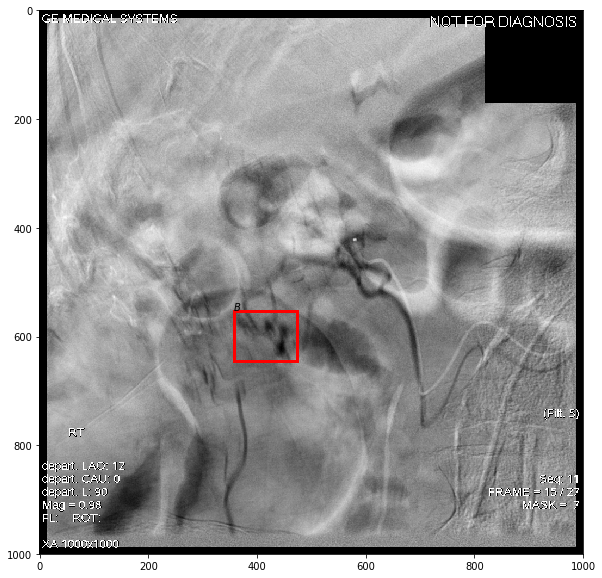

In [26]:
# Another Figure
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)
img, bbox, label = dataset_test[15]
visualization.vis_bbox(img, bbox, label, label_names=bbox_label_names, ax=ax1)
plt.show()

### plot first graphe

[[116.90193 577.9849  234.62566 726.8553 ]
 [775.1829  411.35696 893.9399  500.6212 ]]
[[552. 358. 644. 474.]]


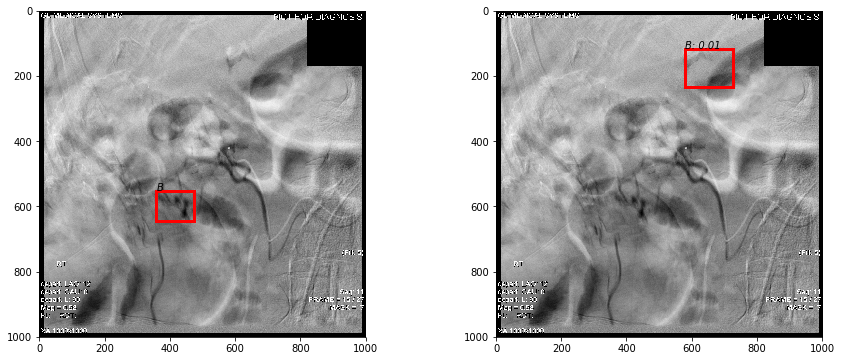

In [31]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[15]
model.score_thresh = 0.0001
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test1.png")

[[511.4437   360.34167  625.9701   496.8401  ]
 [658.67804  108.527435 713.913    145.27388 ]]
[[504. 270. 624. 478.]]


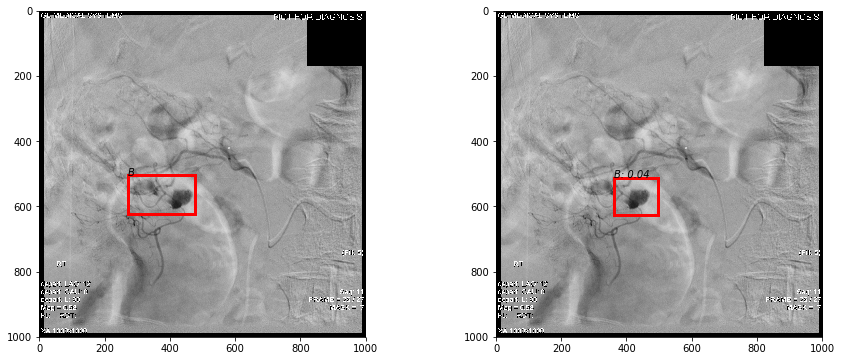

In [32]:
# Prediction of second image
img_1, bbs_1, lbs1 = dataset_test[20]
model.score_thresh = 0.0001
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test2.png")

[[333.8536  383.49237 389.09134 437.68695]]
[[325. 379. 390. 434.]]


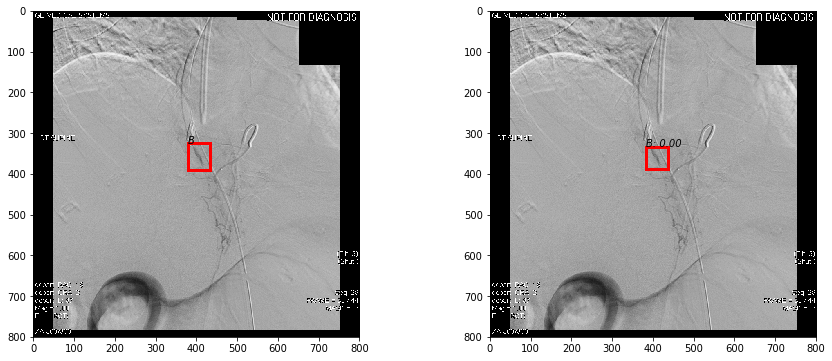

In [33]:
# Prediction of third image
img_1, bbs_1, lbs1 = dataset_test[5]
model.score_thresh = 0.0001
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test3.png")

In [34]:
print scores

[array([0.0021717], dtype=float32)]


/Users/mingrenshen/anaconda2/envs/MedImgAnalysis/lib/python2.7/site-packages/chainercv/transforms/image/resize.py:33: RuntimeWarning: cv2 is not installed on your environment. ChainerCV will fall back on Pillow. Installation of cv2 is recommended for faster computation. 
  RuntimeWarning)


[[523.49945 450.041   613.0673  497.33005]
 [341.8099  645.68414 358.2087  668.2043 ]
 [349.05466 641.68463 365.48196 663.241  ]
 [255.07896 302.6384  272.8194  323.20096]]
[[332. 396. 400. 446.]]


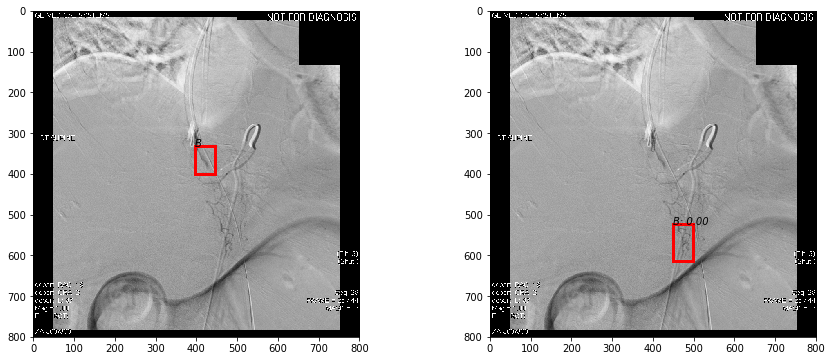

In [18]:
# Prediction of third image
img_1, bbs_1, lbs1 = dataset_test[3]
model.score_thresh = 0.0001
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test3.png")

## loop all the testing figures to check the results

[[332. 386. 385. 425.]]


finished image 0


[[336.7667  390.4824  377.61526 421.96823]]
[[329. 378. 378. 424.]]


finished image 1


[[320.94482 383.5793  373.90253 430.08725]]
[[322. 388. 376. 430.]]


finished image 2


[[523.49945 450.041   613.0673  497.33005]
 [341.8099  645.68414 358.2087  668.2043 ]
 [349.05466 641.68463 365.48196 663.241  ]
 [255.07896 302.6384  272.8194  323.20096]]
[[332. 396. 400. 446.]]
finished image 3


[[426.46597 631.9806  460.78195 674.18933]
 [241.91446 302.1824  271.49124 329.9396 ]
 [436.4476  647.79846 462.76962 664.27844]
 [424.10214 641.46674 448.41635 657.08795]]
[[332. 378. 398. 430.]]


finished image 4


[[333.8536  383.49237 389.09134 437.68695]]
[[325. 379. 390. 434.]]


finished image 5


[[338.8054  473.8153  376.73166 523.4788 ]
 [335.07446 390.09744 384.7176  426.96182]
 [527.6903  447.8149  579.2267  521.77386]
 [346.17108 472.9688  366.81763 500.52435]]
[[322. 384. 386. 430.]]


finished image 6


[[640.6072  212.435   728.3651  316.29004]]
[[336. 396. 402. 448.]]


finished image 7


[[327.8171  274.48694 353.2789  298.65198]]
[[338. 389. 405. 437.]]


finished image 8


[[424.0769  628.95886 459.2174  674.7484 ]
 [535.0537  436.5018  612.93774 496.90683]
 [328.40588 277.52615 352.8777  310.2007 ]
 [337.24512 280.8274  358.1944  297.21497]
 [333.55896 272.16595 350.10162 291.75427]]
[[337. 381. 408. 432.]]


finished image 9


[[238.09131 308.8831  265.44724 340.80466]]
[[352. 394. 381. 425.]]


finished image 10


[[ 89.92532 278.54163 211.13123 395.34082]
 [621.3967  115.27931 654.6371  152.08028]]
[[520. 396. 574. 448.]]
finished image 11


[[290.2432    99.744    340.35696  136.68411 ]
 [521.8741   380.7292   591.705    465.6576  ]
 [287.44717  111.261375 319.4561   130.03992 ]]
[[512. 396. 572. 458.]]


finished image 12


[[504.2011  387.0355  596.0295  479.10403]
 [403.44382 569.4686  535.0231  664.8058 ]]
[[504. 388. 562. 460.]]


finished image 13


[[369.70303 162.83969 421.02463 221.10385]
 [701.2229  251.09288 771.6754  303.96313]]
[[500. 382. 584. 466.]]


finished image 14


[[116.90193 577.9849  234.62566 726.8553 ]
 [775.1829  411.35696 893.9399  500.6212 ]]
[[552. 358. 644. 474.]]


finished image 15


[[831.09143 454.98462 881.3988  510.76184]
 [122.74858 149.76591 160.55739 189.59175]
 [843.6363  470.0437  868.1103  500.0484 ]
 [702.7415  369.14188 752.7391  428.52786]]
[[550. 360. 646. 480.]]


finished image 16


[[538. 398. 616. 492.]]


finished image 17


[[285.53036 314.67648 396.2175  409.5496 ]
 [678.1681  126.96854 725.73706 165.30145]]
[[518. 350. 610. 496.]]


finished image 18


[[532.2466  395.34943 610.98804 499.73047]
 [275.48285 341.90533 391.0044  424.4687 ]
 [659.0121  126.97063 715.1649  166.38066]]
[[506. 340. 614. 500.]]


finished image 19


/Users/mingrenshen/anaconda2/envs/MedImgAnalysis/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[[511.4437   360.34167  625.9701   496.8401  ]
 [658.67804  108.527435 713.913    145.27388 ]]
[[504. 270. 624. 478.]]


finished image 20


[[260.9878  313.64694 366.7682  425.85483]
 [507.1607  342.88992 622.4672  497.49673]
 [205.23529 118.68533 239.89743 163.11597]
 [222.03339 130.41154 243.57141 152.53023]]
[[504. 260. 610. 474.]]


finished image 21


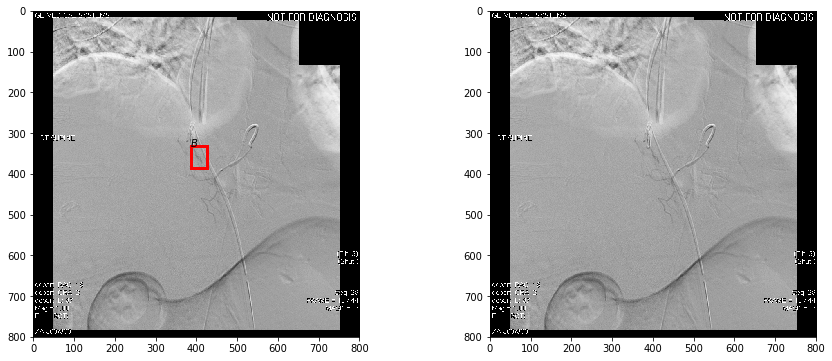

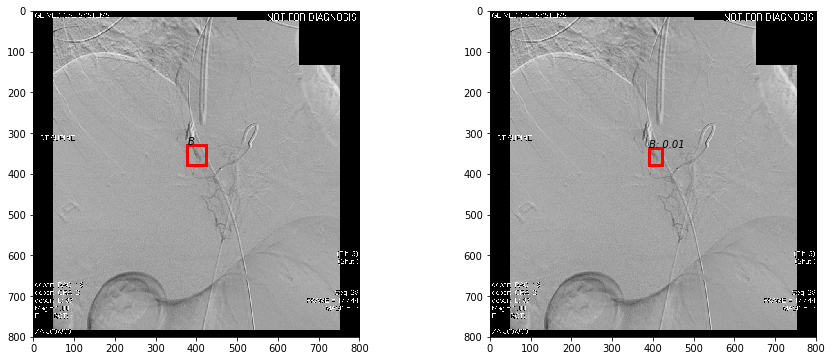

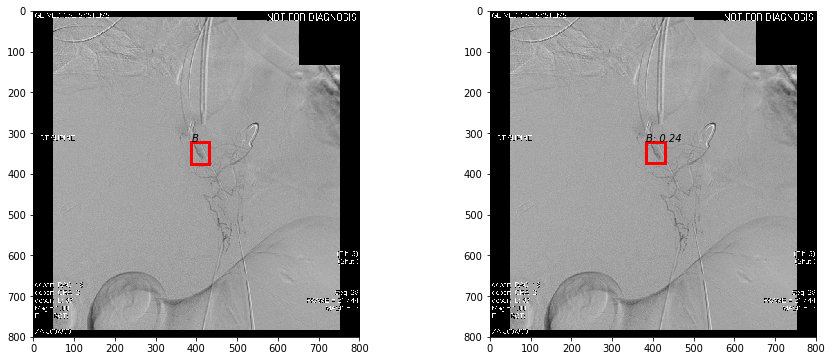

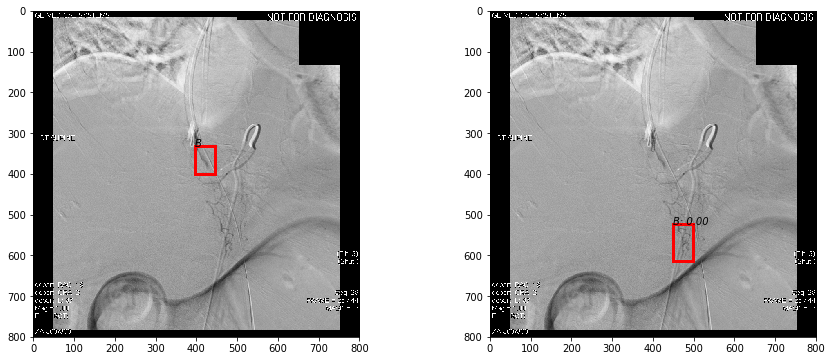

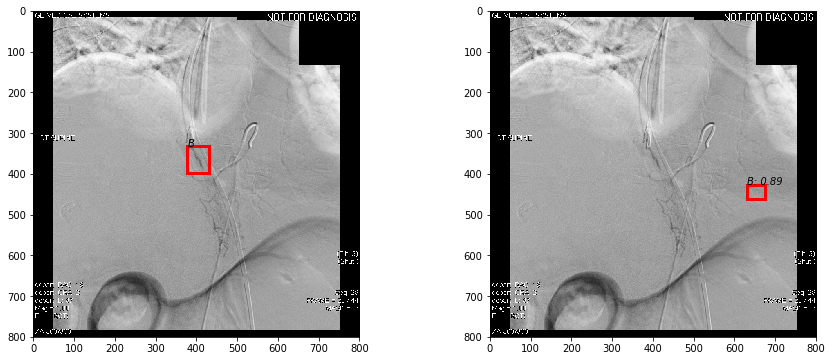

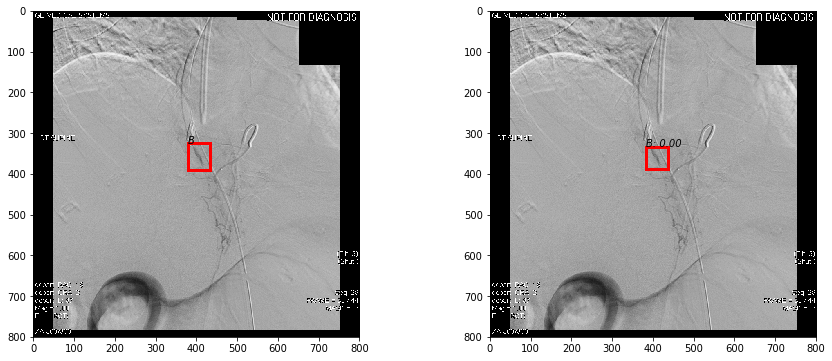

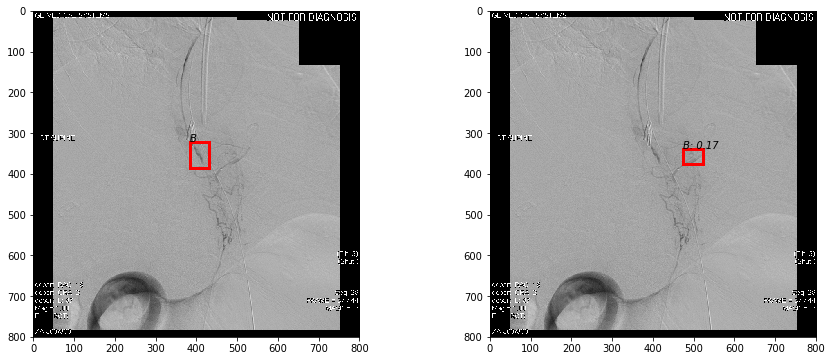

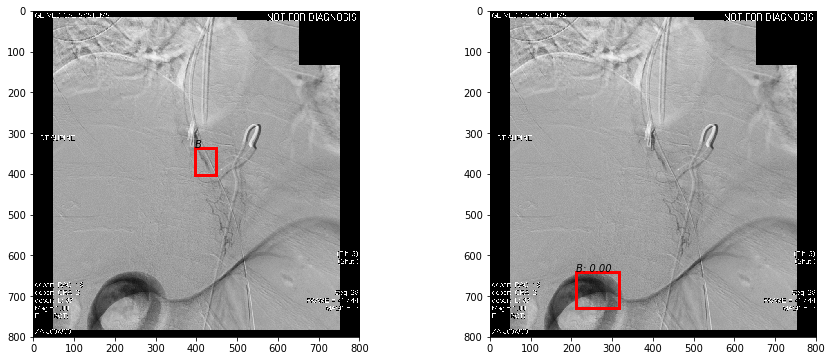

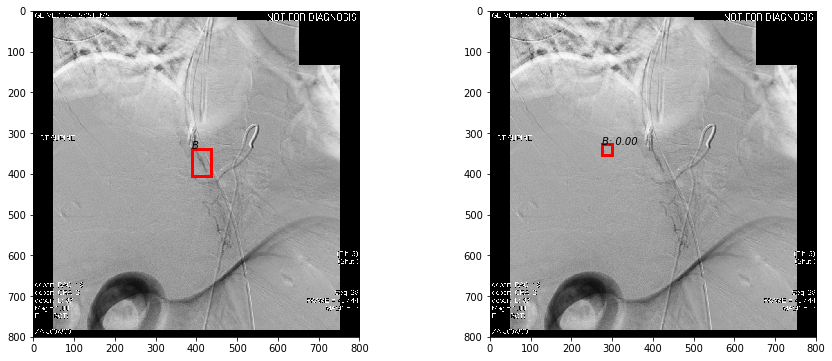

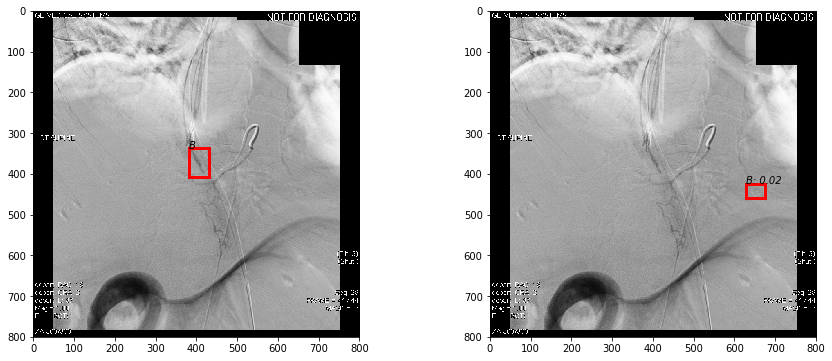

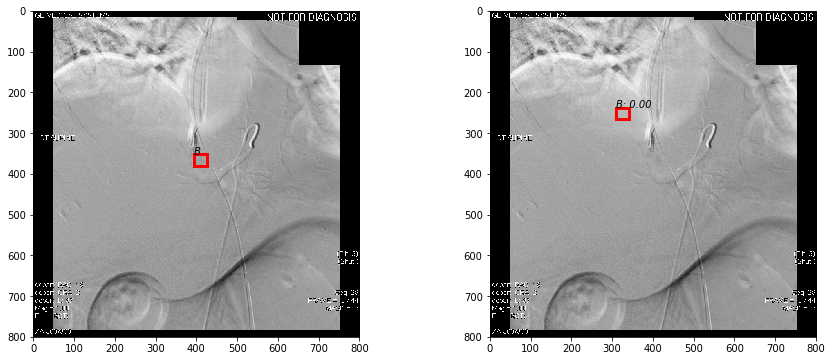

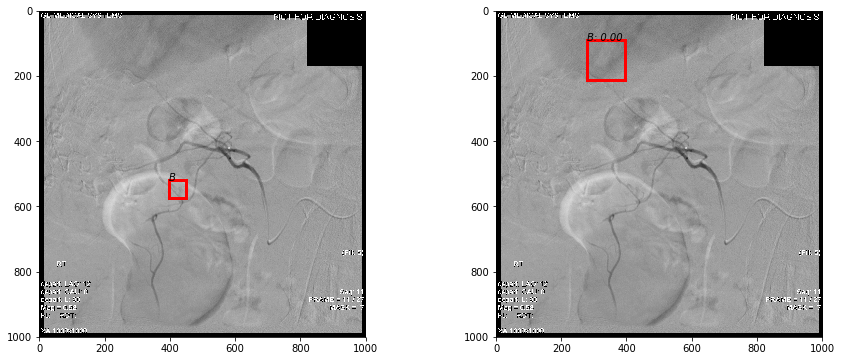

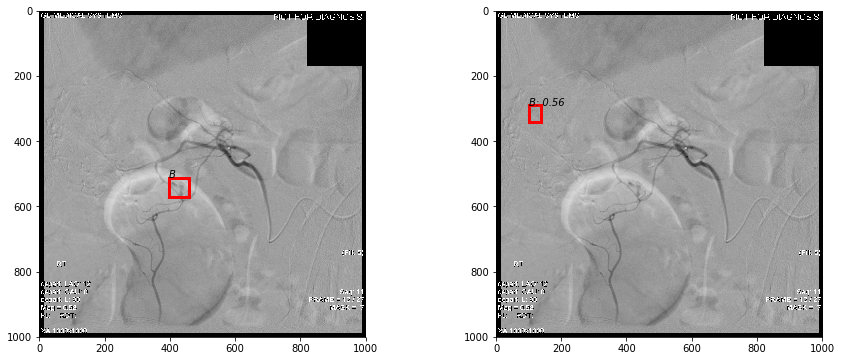

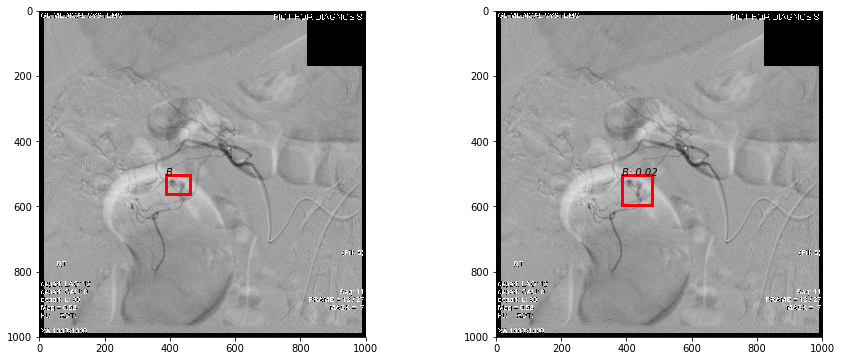

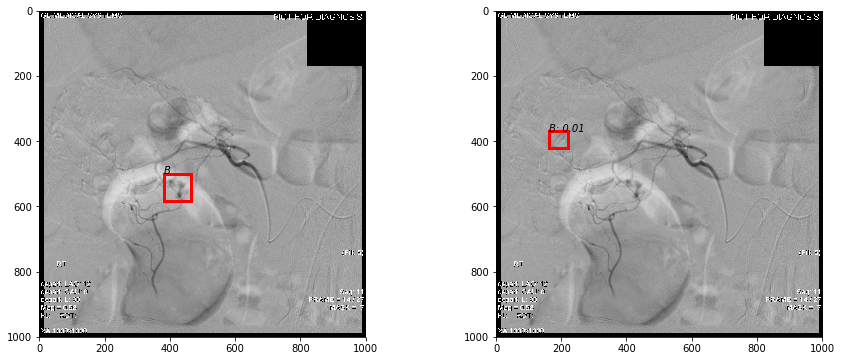

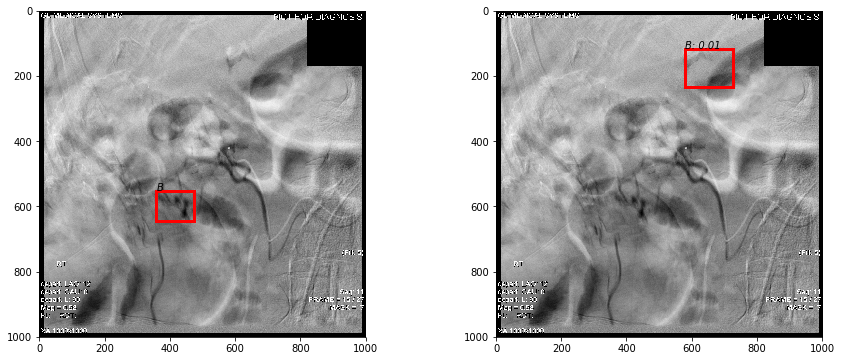

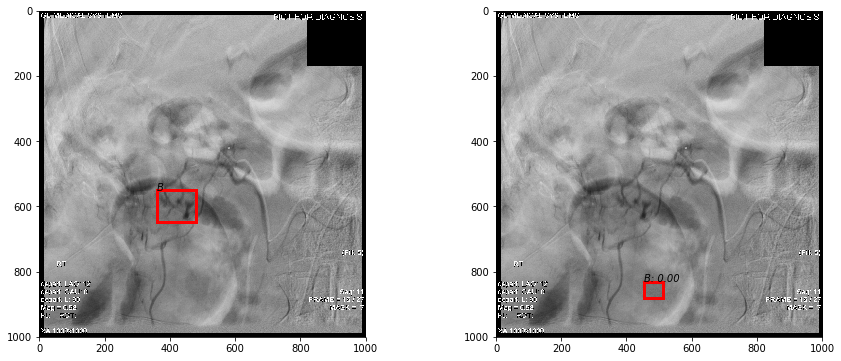

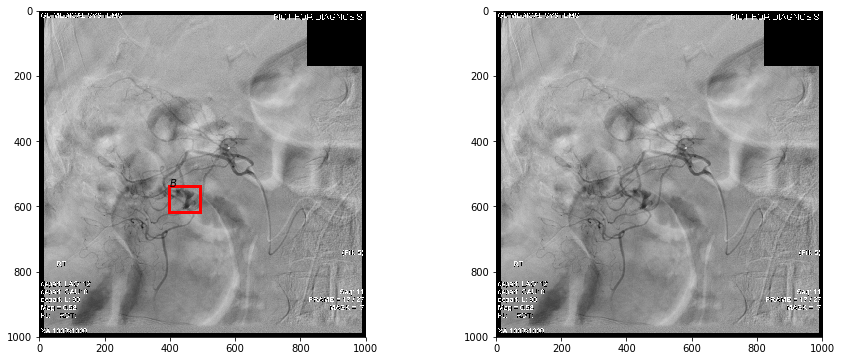

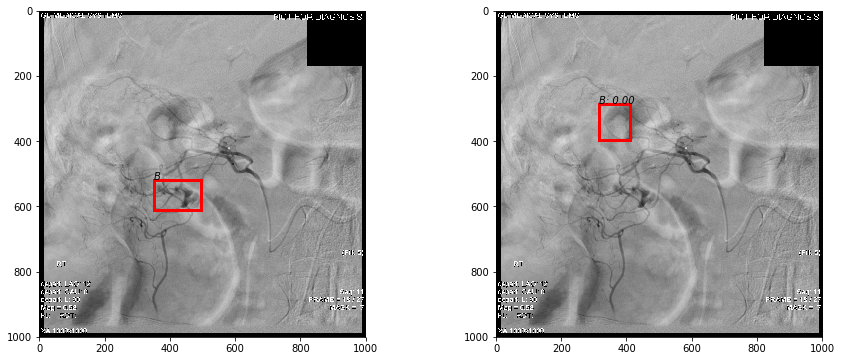

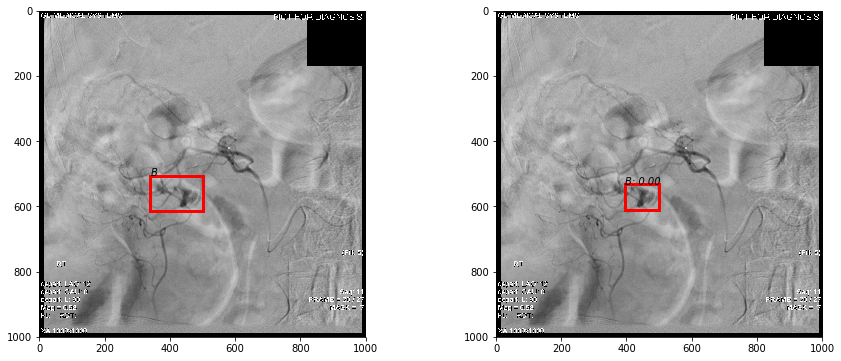

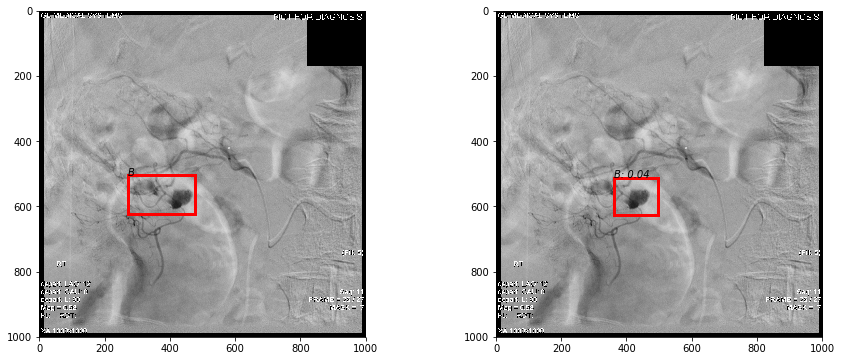

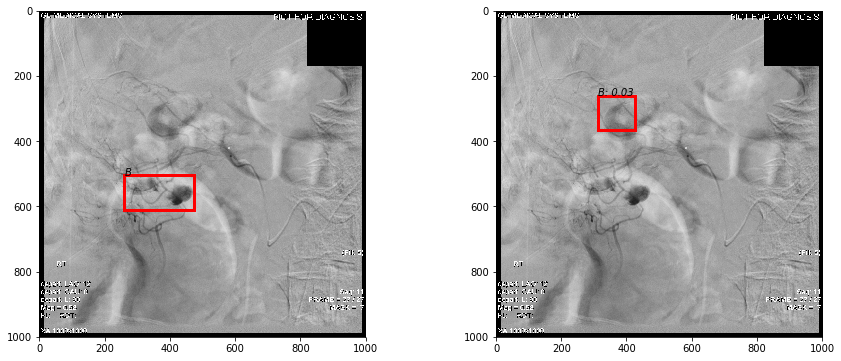

In [20]:
for i in range(0,len(dataset_test)):
	# Prediction of third image
	img_1, bbs_1, lbs1 = dataset_test[i]
	model.score_thresh = 0.0001
	bboxes, labels, scores = model.predict([img_1])
	fig = plt.figure(figsize=(15,6))
	ax1 = fig.add_subplot(1, 2, 2)
	ax2 = fig.add_subplot(1, 2, 1)
	# plot prediction
	visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
	# plot ground truth
	visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
	fig.savefig("test"+str(i)+".png")
	print("finished image %s"%str(i))